# **Part a )**

In [102]:
#Importing necessary modules to read dataset and plot graphs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# Read the data into pandas dataframe
mess_data = pd.read_csv("mess_data.csv")

# Print the data to look for data preparation
mess_data.head()

,Date,Day,Category,Time,Holiday,Total Time
0,20 09 2023,3,1,9:40,0,18:11
1,20 09 2023,3,2,13:51,0,13:59
2,20 09 2023,3,3,21:10,0,25:13
3,21 09 2023,4,1,9:48,0,17:38
4,21 09 2023,4,2,13:22,0,19:36


The collected dataset have time for meal in Date and time format.

*   Convert the Total time value into integer values. Integer values can be in minutes or seconds.
*   I have converted them to seconds instead of minutes for a better accuracy of the prediction model.
*   Days are numbered from as monday = 1 to sunday = 7
*   Category represents 1 = Breakfast; 2 = Lunch; and 3 = Dinner
*   Holiday column: 0 = No and 1 = Yes









In [104]:
# Function definition to convert the time format into seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(":"))
    total_seconds = minutes * 60 + seconds
    return total_seconds

# Appending a new column to the dataset having time in seconds using above function
mess_data['time_in_seconds'] = mess_data['Total Time'].apply(time_to_seconds)

In [105]:
# Print the dataset
mess_data.head()

,Date,Day,Category,Time,Holiday,Total Time,time_in_seconds
0,20 09 2023,3,1,9:40,0,18:11,1091
1,20 09 2023,3,2,13:51,0,13:59,839
2,20 09 2023,3,3,21:10,0,25:13,1513
3,21 09 2023,4,1,9:48,0,17:38,1058
4,21 09 2023,4,2,13:22,0,19:36,1176


In [106]:
# Print the data tpes of each column
mess_data.dtypes

Date               object
Day                 int64
Category            int64
Time               object
Holiday             int64
Total Time         object
time_in_seconds     int64
dtype: object

In [107]:
# Print the data shape
mess_data.shape

(42, 7)

We can see that we have 42 entries and each entries have 7 attributes

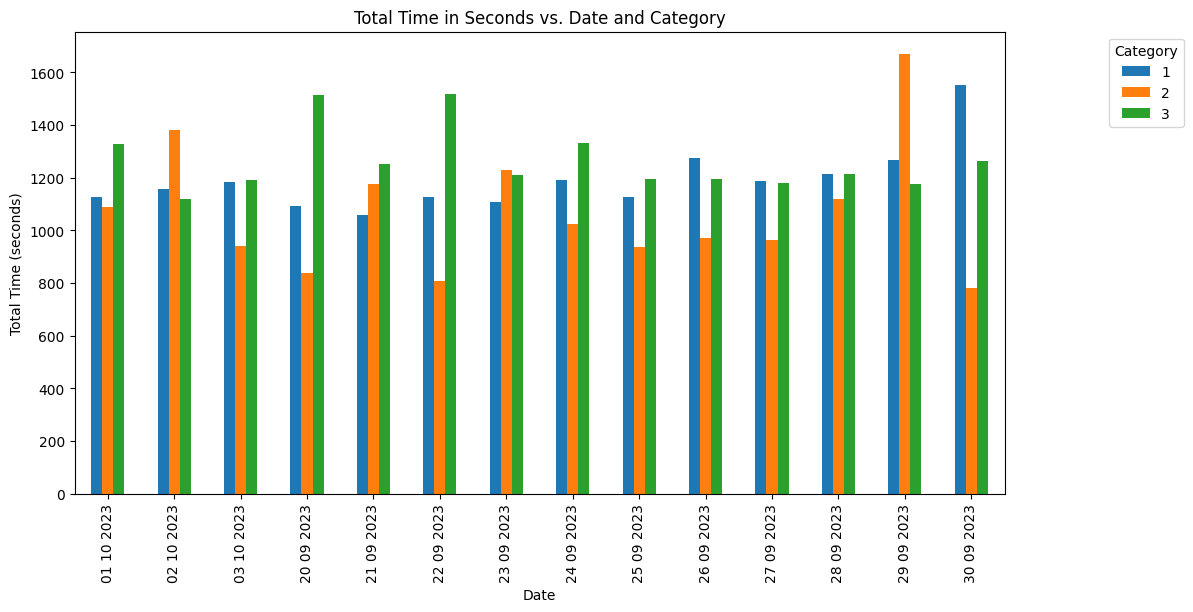

In [108]:
# Grouping the data by Date and Category
grouped_data = mess_data.groupby(['Date', 'Category'])['time_in_seconds'].sum().reset_index()

# Creating a table with date category and time_in_seconds
pivot_data = grouped_data.pivot(index='Date', columns='Category', values='time_in_seconds')

# Creating a bar plot
ax = pivot_data.plot(kind='bar', stacked=False, figsize=(12, 6))

#labels for x and y axis
plt.xlabel('Date')
plt.ylabel('Total Time (seconds)')

#label for the plot title
plt.title('Total Time in Seconds vs. Date and Category')


# Creating legends to make the graph readable
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Plotting the graph
plt.show()

**From the bar graph, we can see the time taken during breakfast, lunch and dinner on each day, from the graph we can see that everyday, time taken is almost same for each category**


---
** Plotting graph for each category **

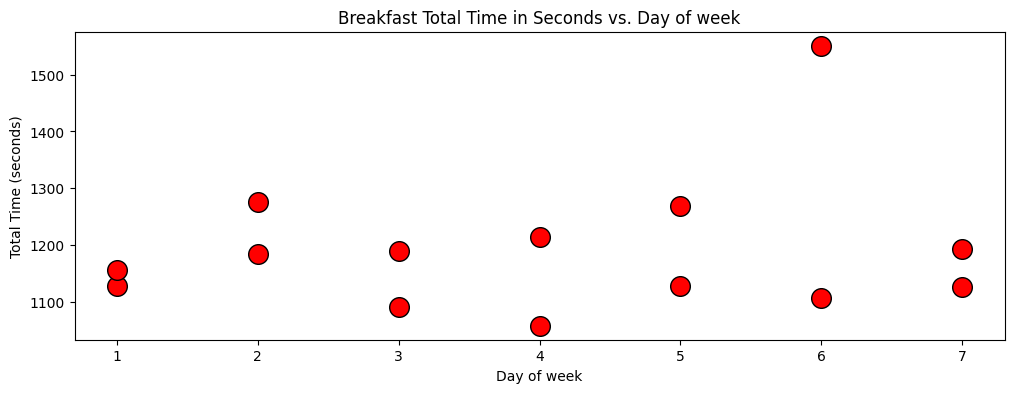

In [109]:
# Selecting the data for breakfast category
breakfast_data = mess_data[mess_data['Category']==1]

# Initailsing the colums for x and y axis
x_axix = breakfast_data['Day']
y_axix = breakfast_data['time_in_seconds']

# Initalize the figure size
plt.figure(figsize=(12, 4))

# Provide labels for x axis, y axis and colours of the plot
plt.scatter(x_axix, y_axix, s=200, edgecolors = "black", c = "red")
plt.xlabel('Day of week')
plt.ylabel('Total Time (seconds)')
plt.title('Breakfast Total Time in Seconds vs. Day of week')

# Show the graph
plt.show()

We can see that for breakfast, we take almost same time, except for day 6 (saturday) where we can see a huge spike, which could be result of queue delay as people tends to wake up late on holidays

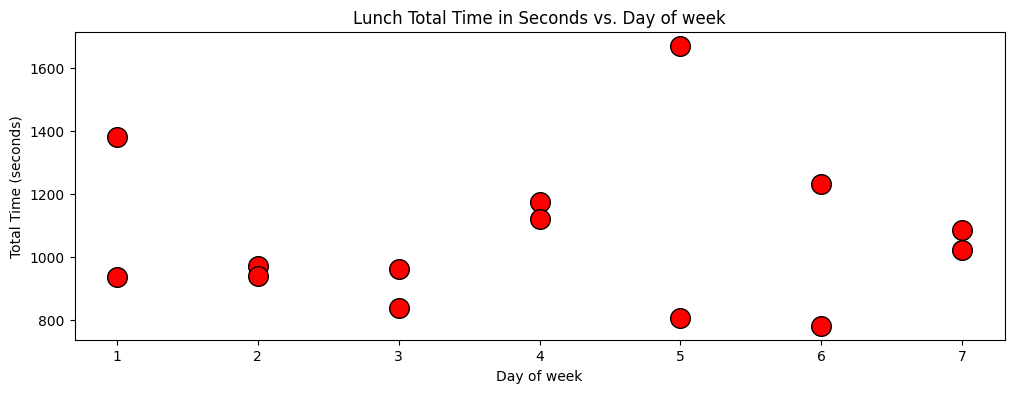

In [110]:
# Select the data for lunch category
lunch_data = mess_data[mess_data['Category']==2]

# Initailse the colums for x and y axis
x_axix = lunch_data['Day']
y_axix = lunch_data['time_in_seconds']

# Initalize the figure size
plt.figure(figsize=(12, 4))

# Provide labels for x, y axis and colours of the plot
plt.scatter(x_axix, y_axix, s=200, edgecolors = "black", c = "red")
plt.xlabel('Day of week')
plt.ylabel('Total Time (seconds)')
plt.title('Lunch Total Time in Seconds vs. Day of week')

# Show the graph
plt.show()

**we can see that in lunch also we are taking almost same time
We can see that there are some spikes in day 1 and day 5 which could be result of queuing delay**


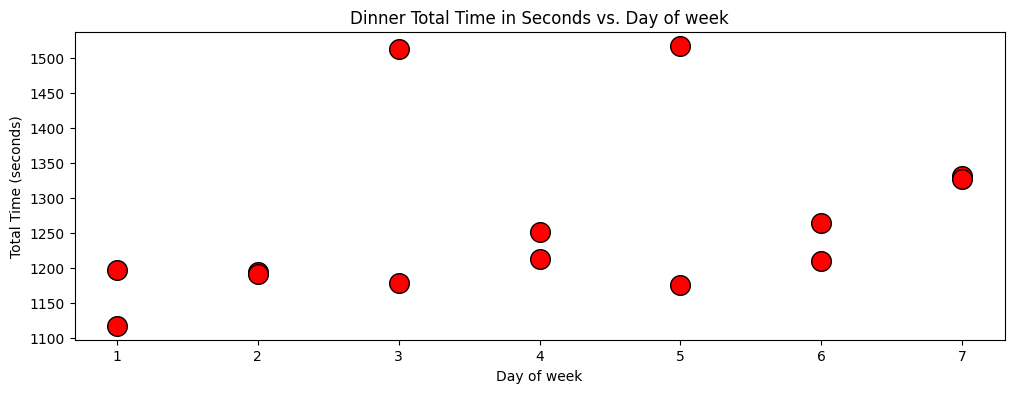

In [111]:
# Select the data for dinner category
dinner_data = mess_data[mess_data['Category']==3]

# Initailse the colums for x and y axis
x_axix = dinner_data['Day']
y_axix = dinner_data['time_in_seconds']

# Initalize the figure size
plt.figure(figsize=(12, 4))

# Provide labels for x, y axis and colours of the plot
plt.scatter(x_axix, y_axix, s=200, edgecolors = "black", c = "red")
plt.xlabel('Day of week')
plt.ylabel('Total Time (seconds)')
plt.title('Dinner Total Time in Seconds vs. Day of week')

# Show the graph
plt.show()

We can see the same pattern in dinner

# **Part b )**

In [112]:
# Import required library for splitting dataset and numerical computations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

In [113]:
# Define the features and the target variable for creating model
input_feature = mess_data[['Day', 'Category', 'Holiday']]
output_value = mess_data['time_in_seconds']

# Split the dataset into training and testing set (80-20)
input_train, input_test, output_train, output_test = train_test_split(input_feature, output_value, test_size=0.2, random_state=47)

In [114]:
# Create decision matrix and add 1's in the first column of the matrix
input_train_with_intercept = np.column_stack((np.ones(len(input_train)), input_train))

# Initialize the parameters with random values
np.random.seed(23)
beta = np.random.rand(input_train_with_intercept.shape[1])

# Setting the hyperparameters of the model
learning_rate = 0.00006
iterations = 1500

Using poission regression, by considering the time taken for each category as count over period of 1 day.

In [115]:
# Define the function for poission regression
def poisson_regression_parameter(x, y, beta, learning_rate, iterations):
    """
   This function helps to learns the optimum value of parameters using MLE estimation

    Args:
        x : Training dataset of features
        y : training dataset of target values
        beta : parameter vector
        learning_rate : self explanable
        num_iterations : self explanable

    Returns:
        beta: the learned parameters
    """

    m = len(y)
    # Iterating to find the optimum value of parameters
    for i in range(iterations):
        # Calculate predicted values using matrix multiplication
        mu = np.exp(np.dot(x, beta))

        # Calculate the gradient using log-likelihood method
        gradient = np.dot(x.T, (y - mu))

        # Update coefficients in bets vector using gradient descent.
        # Here /m helps to normalize the gradient update by effectively
        # scaling the step size based on size of dataset.
        beta += (learning_rate / m) * gradient

    return beta

In [116]:
# Call thepoisson_regression_parameter function to learn parameters
learned_coefficients = poisson_regression_parameter(input_train_with_intercept, output_train, beta, learning_rate, iterations)

# Print the parameters learned from the model
print("Learned Coefficients:", learned_coefficients)

Learned Coefficients: [ 6.99069684e+00  6.77340875e-03  2.53899825e-02 -6.16919488e-04]


The learned coefficient have four values out of which the first one is constant and remaning three are parameters for the three Features.

*   Learned Coefficients[0] = constant = 6.99069684e+00
*   Learned Coefficients[1] = parameter for Day = 6.77340875e-03
*   Learned Coefficients[2] = parameter for Category = 2.53899825e-02
*   Learned Coefficients[3] = parameter for Holiday = -6.16919488e-04

Here, the value parameter for Category is maximum in parameters of the three features. Hence, ***Category*** is important for
prediction.




# **Part c )**

In [117]:
# Create decision matrix by adding 1's in the first column of the matrix
input_test_with_intercept = np.column_stack((np.ones(len(input_test)), input_test))

# Function to predict using the Poisson regression model
def predict_poisson(X, parameters):
    """
    This function predict the values using learned parameters

    Args:
        x : Testing dataset of features
        coefficients : training dataset of target values

    Returns:
      val: the predicted values for given test dataset
    """
    # Calculate predicted values
    val = np.exp(np.dot(X, parameters))
    return val

# Make predictions on the train and test dataset
output_pred_poi_test = predict_poisson(input_test_with_intercept, learned_coefficients)

In [118]:
# Import required library for linear regression
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(input_train, output_train)

LinearRegression()

In [119]:
# Make predictions on the train and test dataset
output_pred_linear_test = model.predict(input_test)

In [120]:
# Evaluate the Poisson Regression Model
mae_poisson_test = mean_absolute_error(output_test, output_pred_poi_test)

# Evaluate the Linear Regression Model
mae_linear_test = mean_absolute_error(output_test, output_pred_linear_test)

# Print the details of Poisson Regression Metrics
print("Poisson Regression Metrics:")
print(f"MAE train data: {mae_poisson_test} seconds")

# Print the details of Poisson Regression Metrics
print("\nLinear Regression Metrics:")
print(f"MAE test data: {mae_linear_test} seconds")

Poisson Regression Metrics:
MAE train data: 72.52640467490252 seconds

Linear Regression Metrics:
MAE test data: 73.61158226726073 seconds



Here, we can oberve that the value of **mean_absolute_error** for the model created is almost same to the linear regression model which is aroung **1 mins**.
